Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 06 - The Fourier Transform

[1.   Introduction](#section_1)  
[2.   Formal definition](#section_2)  
[3.   Fourier transform of some basic functions](#section_3)  
[3.1. Constant function](#section_31)  
[3.2. Sine and cosine functions](#section_32)  
[4.   Transformation of derivatives](#section_4)  
[5.   The Fast Fourier Transform (FFT)](#section_5)  
[6.   Fourier series coefficients from FFT](#section_6)   
[7.   Assignment](#section7)

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 

In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introduction <a name="section_1"></a> 

To understand the _Fourier transform_ we can firstly recall the _Fourier series_ concept, 
according which any _periodic function_ with period $T$ can be expressed as a sum of 
sines and cosines:

$$ f(t) =   a_0 + \sum_{k = 1}^\infty 
           {a_k \, \cos \omega_k t + b_k \, \sin \omega_k t}$$

with $f(t) = f(t + T)$ and $\omega_k = 2k\pi/T$, where:

\begin{align*}
 a_0 &= \frac{1}{T} \int_{-T/2}^{T/2} f(t) \; dt \\ \\
 a_k &= \frac{2}{T} \int_{-T/2}^{T/2} \cos \omega_k t \; f(t) \; dt \\ \\
 b_k &= \frac{2}{T} \int_{-T/2}^{T/2} \sin \omega_k t \; f(t) \; dt
\end{align*}

with $k = 1, 2, \dots\ \infty$.
Recalling that sine and cosine functions have zero mean implies that the 
series coefficient $a_0$ represents the mean value of function $f(t)$.
For example, it can be shown that the Fourier series expansion of a 
_zero mean square wave_ is:

$$ f(t) =   \frac{4}{\pi} \; \sum_{k = 0}^\infty 
            \frac{1}{k}   \;  \sin \omega_{2k+1} t $$

which can be verified with some few Python lines as follows.
Firstly we define a zero mean square wave with periodicity $T = 1$s:


In [11]:
T  =  1           # function periodicity in seconds
N  =  1000        # number of discretization points

t  =  np.linspace(0, T, N)
f1 =  np.zeros(N)

f1[:N//2] = 2.0   # first half period is filled
f1 =   f1 - 1.0   # f1 has zero mean and amplitude one


Then we reconstitutes this same function from Fourier series as given before, but limiting
the infinite summation to only ```Nk``` terms:

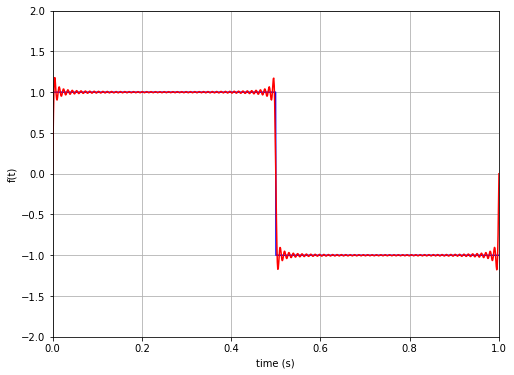

In [13]:
Nk =  101
f2 =  np.zeros(N)

for k in range(1, Nk+1, 2):
    f2  +=  np.sin(2*k*np.pi*t/T)/k

f2 *= 4/np.pi

plt.figure(1, figsize=(8, 6), clear=True)
plt.plot(t, f1, 'b', t, f2, 'r')

plt.xlim( 0, T);  plt.xlabel('time (s)') 
plt.ylim(-2, 2);  plt.ylabel('f(t)') 

plt.grid(True) 


The approximation accuracy can be explored by changing the value assigned to ```Nk``` in
the calculation above. 

It must be emphasized that the series coefficients $a_k$ and $b_k$ hold information about
how to _reconstitutes_ the original function $f(t)$, so they may be seen as _transformed_
functions of variable $\omega_k$ instead of variable $t$.
We will come back later showing how to numerically estimate the Fourier coefficients 
for any periodic function.

Once the Fourier series concept has been understood, the _Fourier transform_ is presented 
in the next section as a extension of the Fourier series concept for $T \rightarrow \infty$.


## 2. Formal definition  <a name="section_2"></a> 

The Fourier series expansion can also be expressed for any real or complex function $f(t)$
by replacing the sine and cosine functions in the previous definition with the 
Euler's formula:

$$ e^{i\omega_k t} = \cos \omega_k t + i \sin_k \omega t$$

what gives:

$$ f(t) =  \sum_{k = -\infty}^\infty {F_k \, e^{i \omega_k t}} $$

where:

$$ F_k = \frac{1}{T} \int_{-T/2}^{T/2} {e^{-i \omega_k t}} \; f(t) \; dt $$

with $ k = 0, \pm 1, \pm 2, \dots\, \pm \infty$.

Now the function periodicity is allowed to increase to infinite to yield the following limits:

\begin{align*}
                               T  &\rightarrow  \infty    \\
      \omega_k = k \Delta \omega  &\rightarrow  \omega    \\
          \Delta \omega = 2\pi/T  &\rightarrow   0
\end{align*}

and also the definition:

$$ \lim_{T \rightarrow \infty} \; \left( T \; F_k  \right)
 = \lim_{\Delta \omega \rightarrow 0} \; \left( \frac{2 \pi} {\Delta \omega} \; F_k \right)
 = F(\omega)$$

which replaced on the series expansion for $f(t)$ gives:

$$ f(t) = \lim_{\Delta \omega \rightarrow 0} \; 
          \left[ \frac{1}{2 \pi} \sum_{k = -\infty}^\infty  e^{i \omega_k t} 
          \left( \frac{2 \pi}{\Delta \omega} \; F_k  \right)
          \Delta \omega \right] $$

and hence:

$$ f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} {e^{i\omega t}\; F(\omega) \; d\omega}
        = \mathscr{F}^{-1} \left\{ F(\omega) \right\} $$

with:

$$ F(\omega) = \int_{-\infty}^{\infty} e^{-i\omega t}\; f(t) \; dt 
             = \mathscr{F}\left\{ f(t) \right\} $$

which are the inverse and the direct _Fourier Transform_ definitions, respectively.
Observing that both integral bounds are infinite, the function $f(t)$ 
must fulfill some special conditions such that the integral convergence
can be ensured.
The most important condition is that the integral of $\left| f(t) \right|$ 
over the complete domain exists:

$$ \exists \int_{-\infty}^{\infty} \left| f(\xi) \right| \; d\xi \in {\mathbb C}$$

although in some special cases the transformation is possible even if this 
condition is not fulfilled.

The transform of a given function and its inverse constitutes a so-called
_transform pair_, usually represented as:

$$ f(t) \Longleftrightarrow F(\omega) $$

While the use of Laplace transforms mostly rely upon _lookup tables_ or CAS 
(_Computer Algebra Systems_), the Fourier transform, both direct and inverse, 
is usually evaluated by means of numerical techniques. 
Nevertheless, some fundamental functions and theorems must receive special 
attention as follows.


## 3. Fourier transform of some basic functions <a name="section_3"></a> 

### 3.1. Constant function <a name="section_31"></a> 

The constant function, $f(t) = c$, does not fulfill the condition for the transform existence
(its integral over the whole domain is infinite), but by assuming that the inverse
transform exists:

$$ c  = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{i\omega t}\; F(\omega) \; dt $$

it can be observed that the only function satifying the integral is the Dirac's Delta:

$$ F(\omega) = 2\pi c \; \delta(\omega) $$

We will numerically demonstrate this result later on.


### 3.2. Sine and cosine functions <a name="section_32"></a> 

The trigonometric functions $\sin(\omega_0 t)$ and $\cos(\omega_0 t)$ also do not fulfill
the condition for transform existence but, in the same way as for the constant function,
a meaningful transform can be found. 
Observe that a given $\omega_0$ is being used instead of the independent variable $\omega$.

Let us assume that the inverse transform of the Euler's formula exists:

$$ f(t) = e^{i\omega_0 t} = \frac{1}{2 \pi} 
          \int_{-\infty}^{\infty} e^{i\omega t}\; F(\omega) \; dt $$

then again the only function satisfying this integral is the Dirac's Delta at $\omega_0$.

$$ F(\omega) = 2 \pi \; \delta (\omega - \omega_0)$$

By going back from Euler's formula it can be easily demonstrated that for the cosine function
it gives:

$$ \mathscr{F} \left\{ \cos (\omega_0 t) \right\} = 
   \pi \left[ \delta(\omega + \omega_0) + \delta(\omega - \omega_0) \right]$$

and similarly for the sine function:

$$ \mathscr{F} \left\{ \sin (\omega_ t) \right\} = 
   i\pi \left[ \delta(\omega + \omega_0) - \delta(\omega - \omega_0) \right]$$

These two transforms are depicted below.

<img src="images/Fourier_sine_cosine.png" alt="Heaviside" width="720px"/>

It can be seen that the cosine transform converges to the constant function transform
as the frequency $\omega_0$ goes to zero.
These results will also be demonstrated after we introduce the numerical approach
to the Fourier transform.


## 4. Transformation of derivatives <a name="section_4"></a> 

The transformation of derivatives is essential for using Fourier transform 
for solving differential equations.
The transform of a derivative is expressed as:

$$ \mathscr{F} \left\{ \frac{df(t)}{dt} \right\} = 
   \int_{-\infty}^{\infty} e^{-i\omega t} \; \frac{d f(t)}{dt} \; dt $$

This can be solved through integration by parts by defining:

\begin{array}{ll}
   u  &= e^{-i\omega t}              \hspace{2cm}  &dv = \frac{d f(t)}{dt} \; dt \\
   du &= -i\omega e^{-i\omega t} dt                &v  = f(t)         
\end{array}

and replacing in:

$$ \int u \; dv = uv - \int v \; du$$

Assuming that the function $f(t)$ may be zero at the far ends of the integration domain
implies that the product $uv$ may be considered to vanish and hence:

$$ \int_{0}^{\infty} e^{-i\omega t} \; \frac{d f(t)}{dt} \; dt = 
   0 + i\omega \int_{-\infty}^{\infty} e^{-i\omega t} \; f(t) \; dt$$

and hence:

$$ \mathscr{F} \left\{ \dot{f}(t) \right\} = i\omega F(\omega)$$

For solving the dynamic equilibrium equation of linear systems, the second time
derivative of $f(t)$ will also be necessary.
Applying again the derivation rule results:

$$ \mathscr{F} \left\{ \ddot{f}(t) \right\} = -\omega^2 F(\omega) $$

Time derivatives of higher order can be calculated but will not be necessary in the
present context.


## 5. The Fast Fourier Transform (FFT) <a name="section_5"></a> 

Let us assume that...


## 6. Fourier series coefficients from FFT <a name="section_6"></a> 

Let us assume that...


In [17]:
M  = 8
f3 = np.ones(M)
F3 = np.fft.fft(f3)/M

print(f3)
print(F3.real)
print(F3.imag)


[1. 1. 1. 1. 1. 1. 1. 1.]
[1. 0. 0. 0. 0. 0. 0. 0.]
[ 0. -0.  0.  0.  0. -0. -0.  0.]


## 7. Assignment <a name="section_7"></a> 

Let us assume that...
